In [ ]:
# 셀레늄의 webdriver 모듈을 임포트합니다.
from selenium import webdriver
# Chrome의 옵션을 설정하기 위한 모듈을 임포트합니다.
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
# time 모듈을 임포트합니다 (sleep 함수 사용을 위해).
import time
import pandas as pd

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Chrome 브라우저 옵션 객체를 생성합니다.
options = Options()
# 브라우저 창을 시작할 때 최대화 상태로 시작하도록 옵션을 추가합니다.
options.add_argument("--start-maximized")
# 필요시 헤드리스 모드 (브라우저 창 안보이게)
# options.add_argument("--headless")

# Chrome 웹드라이버를 초기화하고, 위에서 정의한 옵션을 적용합니다.
driver = webdriver.Chrome(options=options)

try:
    # 네이버 메인 페이지로 이동
    driver.get("https://naver.com/")
    
    # 검색창 찾기 및 검색어 입력
    search_box = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, "#query"))
    )
    search_box.clear()
    search_box.send_keys("IRP")
    search_box.send_keys(Keys.RETURN)
    
    time.sleep(2)
    
    # 카페 탭 클릭
    cafe_tab = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.CSS_SELECTOR, "a[data-tab='cafe']"))
    )
    cafe_tab.click()
    
    time.sleep(3)
    
    # 결과 데이터를 저장할 리스트
    cafe_data = []
    
    # 카페 검색 결과 리스트 찾기
    cafe_results = WebDriverWait(driver, 10).until(
        EC.presence_of_all_elements_located((By.CSS_SELECTOR, ".list_cafe .bx"))
    )
    
    print(f"총 {len(cafe_results)}개의 카페 게시글을 찾았습니다.")
    
    # 각 카페 게시글 정보 추출
    for i, result in enumerate(cafe_results[:10]):  # 상위 10개만 크롤링
        try:
            # 제목 추출
            title_element = result.find_element(By.CSS_SELECTOR, ".title_link")
            title = title_element.text.strip()
            
            # 링크 추출
            link = title_element.get_attribute("href")
            
            # 카페명 추출
            cafe_name_element = result.find_element(By.CSS_SELECTOR, ".sub_txt")
            cafe_name = cafe_name_element.text.strip()
            
            # 작성일 추출
            try:
                date_element = result.find_element(By.CSS_SELECTOR, ".sub_time")
                date = date_element.text.strip()
            except:
                date = "날짜 정보 없음"
            
            # 미리보기 내용 추출 (있는 경우)
            try:
                content_element = result.find_element(By.CSS_SELECTOR, ".dsc_link")
                content_preview = content_element.text.strip()
            except:
                content_preview = "내용 미리보기 없음"
            
            # 데이터 저장
            cafe_data.append({
                "순번": i + 1,
                "제목": title,
                "카페명": cafe_name,
                "작성일": date,
                "내용_미리보기": content_preview,
                "링크": link
            })
            
            print(f"{i+1}. {title[:50]}...")
            
        except Exception as e:
            print(f"게시글 {i+1} 처리 중 오류: {e}")
            continue
    
    # 결과를 DataFrame으로 변환하여 출력
    if cafe_data:
        df = pd.DataFrame(cafe_data)
        print("\n=== 크롤링 결과 ===")
        print(df.to_string(index=False))
        
        # CSV 파일로 저장
        df.to_csv("naver_cafe_irp_search.csv", encoding="utf-8-sig", index=False)
        print("\n결과가 'naver_cafe_irp_search.csv' 파일로 저장되었습니다.")
    else:
        print("크롤링된 데이터가 없습니다.")

except Exception as e:
    print(f"오류 발생: {e}")

finally:
    # 브라우저 종료
    time.sleep(2)
    driver.quit()
    print("브라우저가 종료되었습니다.")

오류 발생: Message: 
Stacktrace:
	GetHandleVerifier [0x0x7ff696d8cda5+78885]
	GetHandleVerifier [0x0x7ff696d8ce00+78976]
	(No symbol) [0x0x7ff696b49bca]
	(No symbol) [0x0x7ff696ba0766]
	(No symbol) [0x0x7ff696ba0a1c]
	(No symbol) [0x0x7ff696bf4467]
	(No symbol) [0x0x7ff696bc8bcf]
	(No symbol) [0x0x7ff696bf122f]
	(No symbol) [0x0x7ff696bc8963]
	(No symbol) [0x0x7ff696b916b1]
	(No symbol) [0x0x7ff696b92443]
	GetHandleVerifier [0x0x7ff697064eed+3061101]
	GetHandleVerifier [0x0x7ff69705f33d+3037629]
	GetHandleVerifier [0x0x7ff69707e592+3165202]
	GetHandleVerifier [0x0x7ff696da730e+186766]
	GetHandleVerifier [0x0x7ff696daeb3f+217535]
	GetHandleVerifier [0x0x7ff696d959b4+114740]
	GetHandleVerifier [0x0x7ff696d95b69+115177]
	GetHandleVerifier [0x0x7ff696d7c368+10728]
	BaseThreadInitThunk [0x0x7ff9e76d259d+29]
	RtlUserThreadStart [0x0x7ff9e8d2af38+40]

브라우저가 종료되었습니다.


In [5]:
# 셀레늄의 webdriver 모듈을 임포트합니다.
from selenium import webdriver
# Chrome의 옵션을 설정하기 위한 모듈을 임포트합니다.
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
# time 모듈을 임포트합니다 (sleep 함수 사용을 위해).
import time
import pandas as pd

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Chrome 브라우저 옵션 객체를 생성합니다.
options = Options()
# 브라우저 창을 시작할 때 최대화 상태로 시작하도록 옵션을 추가합니다.
options.add_argument("--start-maximized")
# 필요시 헤드리스 모드 (브라우저 창 안보이게)
# options.add_argument("--headless")

# Chrome 웹드라이버를 초기화하고, 위에서 정의한 옵션을 적용합니다.
driver = webdriver.Chrome(options=options)

try:
    # 네이버 메인 페이지로 이동
    driver.get("https://naver.com/")
    
    # 검색창 찾기 및 검색어 입력
    search_box = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, "#query"))
    )
    search_box.clear()
    search_box.send_keys("IRP")
    search_box.send_keys(Keys.RETURN)
    
    time.sleep(2)
    
    # 카페 탭 클릭 - 여러 셀렉터 시도
    cafe_tab = None
    selectors = [
        "a[data-tab='cafe']",
        ".tab_menu a[href*='cafe']", 
        ".lnb a[href*='cafe']",
        "a:contains('카페')",
        ".tab_area a[data-area='cafe']"
    ]
    
    for selector in selectors:
        try:
            cafe_tab = WebDriverWait(driver, 5).until(
                EC.element_to_be_clickable((By.CSS_SELECTOR, selector))
            )
            print(f"카페 탭을 찾았습니다: {selector}")
            break
        except:
            continue
    
    if cafe_tab is None:
        # 직접 카페 검색 URL로 이동
        print("카페 탭을 찾을 수 없어 직접 카페 검색 페이지로 이동합니다.")
        driver.get("https://search.naver.com/search.naver?where=cafearticle&query=IRP")
    else:
        cafe_tab.click()
    
    time.sleep(3)
    
    # 결과 데이터를 저장할 리스트
    cafe_data = []
    
    # 카페 검색 결과 리스트 찾기 - 여러 셀렉터 시도
    cafe_results = []
    result_selectors = [
        ".list_cafe .bx",
        ".cafe_list .item",
        ".lst_type .bx",
        ".api_subject_bx",
        ".total_wrap .item"
    ]
    
    for selector in result_selectors:
        try:
            cafe_results = WebDriverWait(driver, 5).until(
                EC.presence_of_all_elements_located((By.CSS_SELECTOR, selector))
            )
            print(f"카페 결과를 찾았습니다: {selector}")
            break
        except:
            continue
    
    if not cafe_results:
        print("카페 검색 결과를 찾을 수 없습니다.")
    
    print(f"총 {len(cafe_results)}개의 카페 게시글을 찾았습니다.")
    
    # 각 카페 게시글 정보 추출
    for i, result in enumerate(cafe_results[:10]):  # 상위 10개만 크롤링
        try:
            # 제목 추출 - 여러 셀렉터 시도
            title = ""
            title_selectors = [".title_link", ".api_txt_lines", ".sub_txt a", "a.title"]
            for selector in title_selectors:
                try:
                    title_element = result.find_element(By.CSS_SELECTOR, selector)
                    title = title_element.text.strip()
                    if title:
                        break
                except:
                    continue
            
            # 링크 추출
            link = ""
            link_selectors = [".title_link", ".api_txt_lines", ".sub_txt a", "a.title"]
            for selector in link_selectors:
                try:
                    link_element = result.find_element(By.CSS_SELECTOR, selector)
                    link = link_element.get_attribute("href")
                    if link:
                        break
                except:
                    continue
            
            # 카페명 추출
            cafe_name = ""
            cafe_selectors = [".sub_txt", ".cafe_name", ".api_source"]
            for selector in cafe_selectors:
                try:
                    cafe_element = result.find_element(By.CSS_SELECTOR, selector)
                    cafe_name = cafe_element.text.strip()
                    if cafe_name:
                        break
                except:
                    continue
            
            # 작성일 추출
            date = "날짜 정보 없음"
            date_selectors = [".sub_time", ".date", ".api_txt_lines"]
            for selector in date_selectors:
                try:
                    date_element = result.find_element(By.CSS_SELECTOR, selector)
                    date = date_element.text.strip()
                    if date:
                        break
                except:
                    continue
            
            # 미리보기 내용 추출
            content_preview = "내용 미리보기 없음"
            content_selectors = [".dsc_link", ".api_txt_lines", ".desc"]
            for selector in content_selectors:
                try:
                    content_element = result.find_element(By.CSS_SELECTOR, selector)
                    content_preview = content_element.text.strip()
                    if content_preview:
                        break
                except:
                    continue
            
            # 데이터가 있는 경우만 저장
            if title or link:
                cafe_data.append({
                    "순번": i + 1,
                    "제목": title,
                    "카페명": cafe_name,
                    "작성일": date,
                    "내용_미리보기": content_preview,
                    "링크": link
                })
                
                print(f"{i+1}. {title[:50]}...")
            
        except Exception as e:
            print(f"게시글 {i+1} 처리 중 오류: {e}")
            continue
    
    # 결과를 DataFrame으로 변환하여 출력
    if cafe_data:
        df = pd.DataFrame(cafe_data)
        print("\n=== 크롤링 결과 ===")
        print(df.to_string(index=False))
        
        # CSV 파일로 저장
        df.to_csv("naver_cafe_irp_search.csv", encoding="utf-8-sig", index=False)
        print("\n결과가 'naver_cafe_irp_search.csv' 파일로 저장되었습니다.")
    else:
        print("크롤링된 데이터가 없습니다.")

except Exception as e:
    print(f"오류 발생: {e}")

finally:
    # 브라우저 종료
    time.sleep(2)
    driver.quit()
    print("브라우저가 종료되었습니다.")

카페 탭을 찾을 수 없어 직접 카페 검색 페이지로 이동합니다.
카페 결과를 찾았습니다: .api_subject_bx
총 14개의 카페 게시글을 찾았습니다.
2. 조건을 충족하지 못하면 IRP로 운용할 수 있다. 퇴직연금은 확정급여(DB)형, 확정기여(...
9. IRP 통장의 목적은, 55세 이후 퇴직연금을 연금 형태로 받고, 세금을 깎아주는 제도입니...

=== 크롤링 결과 ===
 순번                                                                                                                                                                                                                       제목 카페명                                                                                                                                                                                                                      작성일                                                                                                                                                                                                                  내용_미리보기                                                                                                                             

In [6]:
# 셀레늄의 webdriver 모듈을 임포트합니다.
from selenium import webdriver
# Chrome의 옵션을 설정하기 위한 모듈을 임포트합니다.
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
# time 모듈을 임포트합니다 (sleep 함수 사용을 위해).
import time
import pandas as pd
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Chrome 브라우저 옵션 객체를 생성합니다.
options = Options()
# 브라우저 창을 시작할 때 최대화 상태로 시작하도록 옵션을 추가합니다.
options.add_argument("--start-maximized")
# 필요시 헤드리스 모드 (브라우저 창 안보이게)
# options.add_argument("--headless")

# Chrome 웹드라이버를 초기화하고, 위에서 정의한 옵션을 적용합니다.
driver = webdriver.Chrome(options=options)

try:
    # 네이버 카페 검색 페이지로 직접 이동 (IRP 검색)
    search_url = "https://search.naver.com/search.naver?sm=tab_hty.top&ssc=tab.cafe.all&query=irp"
    driver.get(search_url)
    
    time.sleep(3)
    
    # 결과 데이터를 저장할 리스트
    cafe_data = []
    processed_links = set()  # 중복 제거를 위한 링크 저장
    
    print("스크롤을 내리면서 데이터를 수집합니다...")
    
    # 스크롤 10번 수행하면서 데이터 수집
    for scroll_count in range(10):
        print(f"\n=== {scroll_count + 1}번째 스크롤 ===")
        
        # 현재 페이지의 모든 카페 게시글 찾기
        cafe_items = driver.find_elements(By.CSS_SELECTOR, "#main_pack > section > div.api_subject_bx > ul > li")
        
        print(f"현재 페이지에서 {len(cafe_items)}개의 게시글을 발견했습니다.")
        
        # 각 게시글에서 정보 추출
        for i, item in enumerate(cafe_items):
            try:
                # 제목 추출
                title_element = item.find_element(By.CSS_SELECTOR, "div > div.detail_box > div.title_area")
                title = title_element.text.strip()
                
                # 제목 링크 추출 (중복 체크용)
                try:
                    title_link = title_element.find_element(By.CSS_SELECTOR, "a").get_attribute("href")
                except:
                    title_link = f"no_link_{scroll_count}_{i}"
                
                # 이미 처리한 게시글이면 스킵
                if title_link in processed_links:
                    continue
                
                processed_links.add(title_link)
                
                # 내용 추출
                try:
                    content_element = item.find_element(By.CSS_SELECTOR, "div > div.detail_box > div.dsc_area")
                    content = content_element.text.strip()
                except:
                    content = "내용 없음"
                
                # 사용자 정보 추출
                try:
                    user_element = item.find_element(By.CSS_SELECTOR, "div > div.user_box > div.user_box_inner > div")
                    user_info = user_element.text.strip()
                except:
                    user_info = "사용자 정보 없음"
                
                # 카페명 추출 (추가)
                try:
                    cafe_name_element = item.find_element(By.CSS_SELECTOR, "div > div.user_box .sub_txt")
                    cafe_name = cafe_name_element.text.strip()
                except:
                    cafe_name = "카페명 없음"
                
                # 작성일 추출 (추가)
                try:
                    date_element = item.find_element(By.CSS_SELECTOR, "div > div.user_box .sub_time")
                    post_date = date_element.text.strip()
                except:
                    post_date = "날짜 없음"
                
                # 데이터 저장
                if title:  # 제목이 있는 경우만 저장
                    cafe_data.append({
                        "순번": len(cafe_data) + 1,
                        "제목": title,
                        "내용": content,
                        "사용자_정보": user_info,
                        "카페명": cafe_name,
                        "작성일": post_date,
                        "링크": title_link
                    })
                    
                    print(f"  {len(cafe_data)}. {title[:50]}...")
                
            except Exception as e:
                # 개별 게시글 처리 오류는 무시하고 계속 진행
                continue
        
        # 페이지 맨 아래로 스크롤
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(2)
        
        # 더보기 버튼이 있다면 클릭
        try:
            more_button = driver.find_element(By.CSS_SELECTOR, ".btn_more, .more_btn, button[class*='more']")
            if more_button.is_displayed():
                driver.execute_script("arguments[0].click();", more_button)
                print("더보기 버튼을 클릭했습니다.")
                time.sleep(3)
        except:
            pass
        
        print(f"현재까지 총 {len(cafe_data)}개의 게시글을 수집했습니다.")
    
    # 결과를 DataFrame으로 변환하여 출력
    if cafe_data:
        df = pd.DataFrame(cafe_data)
        print(f"\n=== 최종 크롤링 결과: 총 {len(cafe_data)}개 ===")
        
        # 처음 5개 결과 미리보기
        print("\n처음 5개 결과 미리보기:")
        print(df.head().to_string(index=False))
        
        # CSV 파일로 저장
        filename = f"naver_cafe_irp_crawling_{int(time.time())}.csv"
        df.to_csv(filename, encoding="utf-8-sig", index=False)
        print(f"\n✅ 결과가 '{filename}' 파일로 저장되었습니다.")
        
        # 통계 정보
        print(f"\n📊 수집 통계:")
        print(f"- 총 게시글 수: {len(cafe_data)}개")
        print(f"- 내용이 있는 게시글: {len([d for d in cafe_data if d['내용'] != '내용 없음'])}개")
        print(f"- 사용자 정보가 있는 게시글: {len([d for d in cafe_data if d['사용자_정보'] != '사용자 정보 없음'])}개")
        
    else:
        print("❌ 크롤링된 데이터가 없습니다.")

except Exception as e:
    print(f"❌ 오류 발생: {e}")
    print("현재 페이지 URL:", driver.current_url)

finally:
    # 브라우저 종료
    time.sleep(2)
    driver.quit()
    print("\n🔚 브라우저가 종료되었습니다.")

스크롤을 내리면서 데이터를 수집합니다...

=== 1번째 스크롤 ===
현재 페이지에서 30개의 게시글을 발견했습니다.
  1. irp etf 선택 추천 !...
  2. irp 계좌 추천 자세히...
  3. 연금저축과 퇴직연금(irp) 궁금...
  4. 연금저축 추가..irp개설..그리고 isa...
  5. 개인 IRP 퇴직연금 계좌 관련 질문...
  6. IRP계좌에서 슈드:나스닥 6대4 비율 맞추는 팁...
  7. 퇴직 IRP 계좌 질문해요.....
  8. 연금저축펀드, IRP, ISA에 대한 고민...
  9. 개인사업자분들 연금저축,irp,isa 전부 하시나요?...
  10. 개인형irp통장 개설하였는데요 궁금한게 있습니다...
  11. 나무증권에서 irp 쓰시는분들...
  12. irp개인연금에 대해서...
  13. irp 증권사 추천해주실 수 있나요?...
  14. irp추천종목 문의...
  15. 얼마전에 퇴직하고 퇴직연금을 IRP로 가져왔는데요...
  16. irp 연금개시중일때...
  17. IRP 설명해주실분~...
  18. 연금저축펀드, irp 계좌 예수금 운용 방법...
  19. 근로소득 없으면 irp 소용없을까요?...
  20. 퇴직금 IRP 계좌 관리...
  21. 여기 회원님들은 Isa와 연금저축보다는 irp를 관심...
  22. 미래에셋에서 IRP 투자하시는 분들 질문있습니다!...
  23. isa ,연금저축,irp에서 국내배당etf 투자시...
  24. irp계좌 tdf etf 질문드립니다~...
  25. IRP 투자 & 인출에 관한 질문입니다....
  26. 기타 irp 계좌문의...
  27. 연저펀 & IRP & ISA 기계적 적립...
  28. irp관련하여...
  29. IRP계좌에서 ISA로 투자하기(?) [부제:산넘어 산]...
  30. 연금저축 & IRP 질문이요~~...
현재까지 총 30개의 게시글을 수집했습니다.

=== 2번째 스크롤 ===
현재 페이지에서 60

In [8]:
!pip install pandas matplotlib wordcloud openpyxl
!pip install WordCloud

🔍 CSV 키워드 분석을 시작합니다...

✅ CSV 파일 로드 완료: 300개 행
📝 텍스트 전처리 중...
전처리 완료: 300개의 유효한 텍스트

🔤 일반 키워드 추출 중...

📊 === 상위 30개 일반 키워드 ===
 1. IRP        : 356회
 2. irp        : 250회
 3. 만원         :  78회
 4. 계좌         :  72회
 5. 퇴직연금       :  70회
 6. 300        :  63회
 7. 900        :  59회
 8. 10         :  53회
 9. ETF        :  51회
10. 600        :  49회
11. 제가         :  49회
12. 있습니다       :  48회
13. ISA        :  46회
14. 계좌를        :  46회
15. 계좌로        :  44회
16. 퇴직금        :  39회
17. 세액공제       :  38회
18. 100        :  37회
19. 계좌에        :  35회
20. 연금         :  35회
21. 어떻게        :  34회
22. 하는데        :  33회
23. DC         :  33회
24. isa        :  32회
25. 500        :  32회
26. 안녕하세요      :  31회
27. 연금저축       :  31회
28. 하고         :  31회
29. 개인형        :  30회
30. 퇴직금을       :  30회

💰 IRP 관련 키워드 분석 중...

📊 === IRP 관련 키워드 빈도 ===
연금         : 375회
퇴직연금       : 151회
연금저축       : 144회
세액공제       : 113회
은행         :  95회
투자         :  93회
증권         :  87회
적립         :  71회
상품         :  61회
수익률 

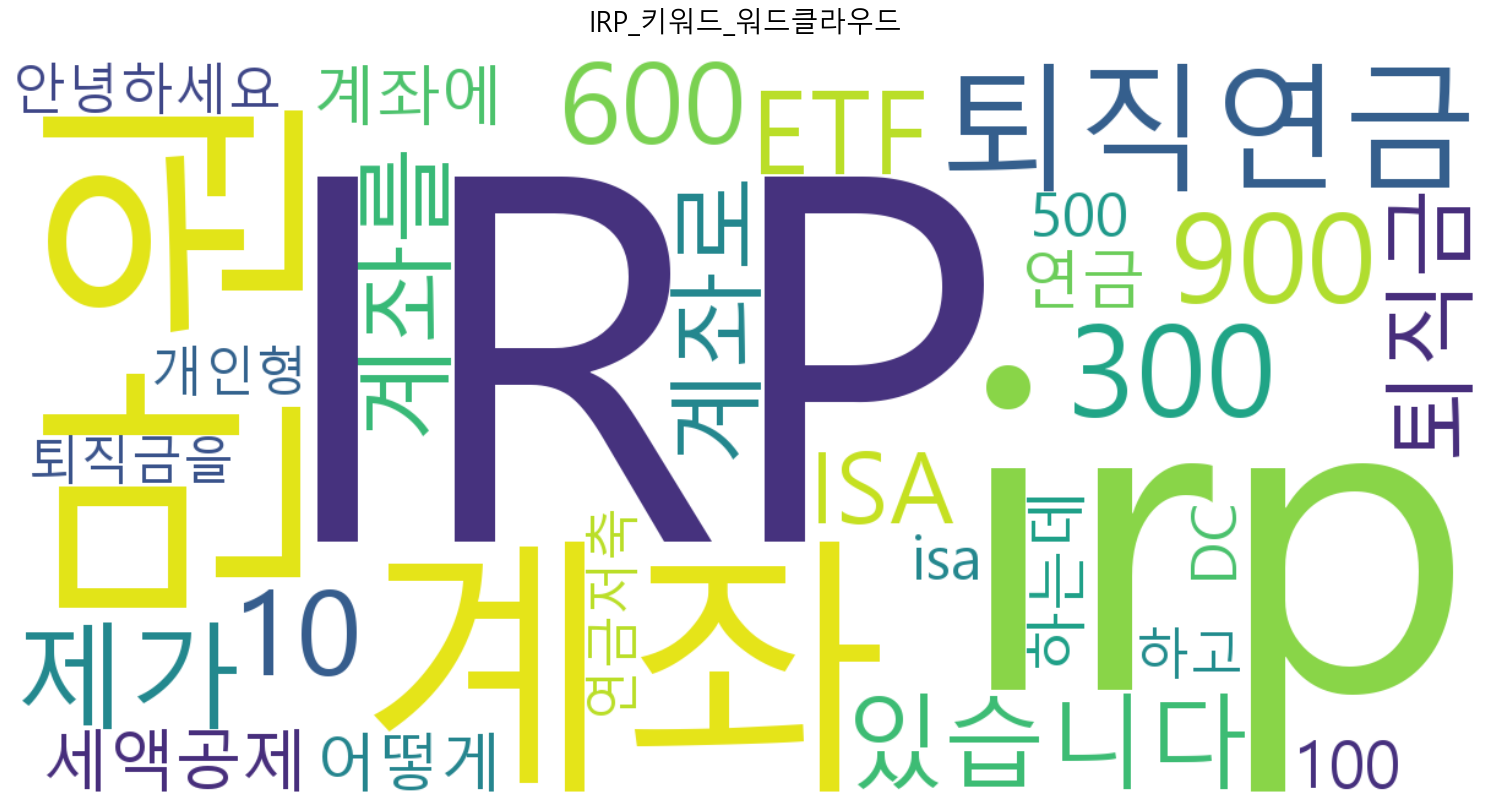

✅ 워드클라우드가 'IRP_키워드_워드클라우드.png'로 저장되었습니다.

📈 === 분석 요약 ===
총 게시글 수: 300개
분석 대상 텍스트: 300개
추출된 일반 키워드: 30개
IRP 관련 키워드 중 언급된 것: 18개


In [10]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

# 한국어 폰트 설정 (wordcloud용)
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
# plt.rcParams['font.family'] = 'AppleGothic'  # Mac
plt.rcParams['axes.unicode_minus'] = False

# CSV 파일 읽기
def load_csv_data(file_path):
    """CSV 파일을 읽어서 DataFrame으로 반환"""
    try:
        df = pd.read_csv(file_path, encoding='utf-8-sig')
        print(f"✅ CSV 파일 로드 완료: {len(df)}개 행")
        return df
    except Exception as e:
        print(f"❌ CSV 파일 로드 실패: {e}")
        return None

# 텍스트 전처리 함수
def preprocess_text(text):
    """텍스트 전처리: 특수문자 제거, 소문자 변환 등"""
    if pd.isna(text) or text == "내용 없음":
        return ""
    
    # 특수문자 제거 (한글, 영문, 숫자만 남김)
    text = re.sub(r'[^\w\s가-힣]', ' ', str(text))
    # 연속된 공백을 하나로
    text = re.sub(r'\s+', ' ', text)
    # 앞뒤 공백 제거
    text = text.strip()
    
    return text

# 불용어 리스트 (의미없는 단어들)
STOP_WORDS = {
    '있는', '없는', '이는', '그는', '저는', '우리', '여러', '모든', '각각', '따라',
    '통해', '위해', '대해', '관해', '그리고', '하지만', '그러나', '또한', '또는',
    '이런', '저런', '그런', '이것', '저것', '그것', '여기', '저기', '거기',
    '때문', '경우', '상황', '정도', '정말', '진짜', '너무', '아주', '매우',
    '조금', '많이', '적게', '크게', '작게', '높게', '낮게', '빠르게', '느리게',
    '이미', '벌써', '아직', '곧', '나중', '먼저', '다음', '이전', '지금', '현재',
    '오늘', '어제', '내일', '요즘', '최근', '앞으로', '미래', '과거',
    '내용', '없음', '정보', '사용자', '게시글', '댓글', '답변', '질문'
}

# 키워드 추출 함수
def extract_keywords(texts, min_length=2, top_n=50):
    """텍스트에서 키워드 추출"""
    # 모든 텍스트 합치기
    all_text = ' '.join(texts)
    
    # 단어 분리 (2글자 이상)
    words = re.findall(r'[가-힣]{' + str(min_length) + ',}|[A-Za-z]{' + str(min_length) + ',}|\d+', all_text)
    
    # 불용어 제거
    filtered_words = [word for word in words if word not in STOP_WORDS and len(word) >= min_length]
    
    # 빈도 계산
    word_counts = Counter(filtered_words)
    
    return word_counts.most_common(top_n)

# IRP 관련 특화 키워드 분석
def analyze_irp_keywords(texts):
    """IRP 관련 특화 키워드 분석"""
    # IRP 관련 키워드 패턴
    irp_patterns = {
        '세액공제': r'세액공제|세공제|공제',
        '연금저축': r'연금저축|연저축',
        '퇴직연금': r'퇴직연금|퇴연금|DC|DB',
        '펀드': r'펀드|fund',
        '수익률': r'수익률|수익|return',
        '투자': r'투자|investment',
        '적립': r'적립|납입',
        '은행': r'은행|뱅크|bank',
        '증권': r'증권|securities',
        '보험': r'보험|insurance',
        '연금': r'연금|pension',
        '금융': r'금융|금융사|finance',
        '상품': r'상품|product',
        '한도': r'한도|limit',
        '비용': r'비용|수수료|fee',
        '추천': r'추천|recommend',
        '비교': r'비교|compare',
        '선택': r'선택|choice'
    }
    
    all_text = ' '.join(texts)
    irp_results = {}
    
    for category, pattern in irp_patterns.items():
        matches = re.findall(pattern, all_text, re.IGNORECASE)
        irp_results[category] = len(matches)
    
    return sorted(irp_results.items(), key=lambda x: x[1], reverse=True)

# 워드클라우드 생성
def create_wordcloud(word_freq, title="키워드 워드클라우드"):
    """워드클라우드 생성 및 저장"""
    try:
        # 워드클라우드 생성
        wordcloud = WordCloud(
            font_path='malgun.ttf',  # Windows 한글 폰트
            # font_path='/System/Library/Fonts/AppleGothic.ttf',  # Mac 한글 폰트
            width=1200, 
            height=600, 
            background_color='white',
            max_words=100,
            colormap='viridis'
        ).generate_from_frequencies(dict(word_freq))
        
        # 플롯 생성
        plt.figure(figsize=(15, 8))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(title, fontsize=20, pad=20)
        plt.tight_layout()
        
        # 저장
        filename = f"{title.replace(' ', '_')}.png"
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        plt.show()
        
        print(f"✅ 워드클라우드가 '{filename}'로 저장되었습니다.")
        
    except Exception as e:
        print(f"❌ 워드클라우드 생성 실패: {e}")
        print("한글 폰트 경로를 확인해주세요.")

# 메인 분석 함수
def analyze_csv_keywords(csv_file_path):
    """CSV 파일의 키워드 종합 분석"""
    
    print("🔍 CSV 키워드 분석을 시작합니다...\n")
    
    # 1. CSV 파일 로드
    df = load_csv_data(csv_file_path)
    if df is None:
        return
    
    # 2. '내용' 컬럼 확인
    if '내용' not in df.columns:
        print("❌ '내용' 컬럼을 찾을 수 없습니다.")
        print(f"사용 가능한 컬럼: {list(df.columns)}")
        return
    
    # 3. 텍스트 전처리
    print("📝 텍스트 전처리 중...")
    df['내용_전처리'] = df['내용'].apply(preprocess_text)
    valid_texts = df[df['내용_전처리'] != '']['내용_전처리'].tolist()
    
    print(f"전처리 완료: {len(valid_texts)}개의 유효한 텍스트")
    
    if not valid_texts:
        print("❌ 분석할 텍스트가 없습니다.")
        return
    
    # 4. 일반 키워드 추출
    print("\n🔤 일반 키워드 추출 중...")
    general_keywords = extract_keywords(valid_texts, min_length=2, top_n=30)
    
    print("\n📊 === 상위 30개 일반 키워드 ===")
    for i, (word, count) in enumerate(general_keywords, 1):
        print(f"{i:2d}. {word:<10} : {count:3d}회")
    
    # 5. IRP 특화 키워드 분석
    print("\n💰 IRP 관련 키워드 분석 중...")
    irp_keywords = analyze_irp_keywords(valid_texts)
    
    print("\n📊 === IRP 관련 키워드 빈도 ===")
    for category, count in irp_keywords:
        if count > 0:
            print(f"{category:<10} : {count:3d}회")
    
    # 6. 결과를 DataFrame으로 저장
    results_df = pd.DataFrame({
        '일반_키워드': [word for word, count in general_keywords],
        '일반_빈도': [count for word, count in general_keywords]
    })
    
    irp_df = pd.DataFrame(irp_keywords, columns=['IRP_키워드', 'IRP_빈도'])
    
    # 7. 결과 CSV 저장
    results_filename = f"keyword_analysis_results_{int(pd.Timestamp.now().timestamp())}.csv"
    
    with pd.ExcelWriter(results_filename.replace('.csv', '.xlsx')) as writer:
        results_df.to_excel(writer, sheet_name='일반키워드', index=False)
        irp_df.to_excel(writer, sheet_name='IRP키워드', index=False)
        df[['제목', '내용', '내용_전처리']].to_excel(writer, sheet_name='원본데이터', index=False)
    
    print(f"\n✅ 분석 결과가 '{results_filename.replace('.csv', '.xlsx')}'로 저장되었습니다.")
    
    # 8. 워드클라우드 생성
    if len(general_keywords) > 0:
        print("\n🎨 워드클라우드 생성 중...")
        create_wordcloud(general_keywords, "IRP_키워드_워드클라우드")
    
    # 9. 요약 통계
    print(f"\n📈 === 분석 요약 ===")
    print(f"총 게시글 수: {len(df)}개")
    print(f"분석 대상 텍스트: {len(valid_texts)}개")
    print(f"추출된 일반 키워드: {len(general_keywords)}개")
    print(f"IRP 관련 키워드 중 언급된 것: {len([x for x in irp_keywords if x[1] > 0])}개")
    
    return results_df, irp_df

# 실행 예시
if __name__ == "__main__":
    # CSV 파일 경로를 입력하세요
    csv_file_path = "naver_cafe_irp_crawling_1750728281.csv"  # 여기에 실제 파일명을 입력하세요
    
    # 분석 실행
    general_results, irp_results = analyze_csv_keywords(csv_file_path)

In [12]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


🔍 사용자 니즈 분석을 시작합니다...
✅ CSV 파일 로드: 300개 행
🎯 ============================================================
🎯 사용자 니즈 분석 리포트
🎯 ============================================================

📊 주요 니즈 순위 (Top 5)
--------------------------------------------------
1. 미래준비 (33.2%)
   → 노후나 미래를 위한 준비를 하고 싶어함
   → 언급 횟수: 477회
   → 주요 키워드: 연금(366), 미래(34), 노후(24)

2. 세금절약 (25.3%)
   → 세금 부담을 줄이고 싶어함
   → 언급 횟수: 363회
   → 주요 키워드: 공제(113), 세액공제(75), 세금(57)

3. 정보탐색 (13.5%)
   → 상품/서비스 정보를 찾거나 비교하고 싶어함
   → 언급 횟수: 194회
   → 주요 키워드: 궁금(39), 어떤(31), 질문(26)

4. 수익최적화 (7.7%)
   → 더 높은 수익을 원함
   → 언급 횟수: 110회
   → 주요 키워드: 수익(59), 수익률(20), 좋은(19)

5. 선택고민 (6.8%)
   → 너무 많은 선택지로 결정하기 어려워함
   → 언급 횟수: 97회
   → 주요 키워드: 어떻게(35), 고민(25), 모르겠(11)

😊 감정 분석
------------------------------
긍정: 57회 (55.9%)
부정: 9회 (8.8%)
중립: 36회 (35.3%)

⏰ 긴급도 분석
------------------------------
긴급: 17회 (43.6%)
여유: 22회 (56.4%)

😰 주요 고통점 (Pain Points)
----------------------------------------
1. ✅ 결론 IRP 계좌에서도 위험자산은 슈드와 나스닥을 반반, 안전자산은 솔미채로 

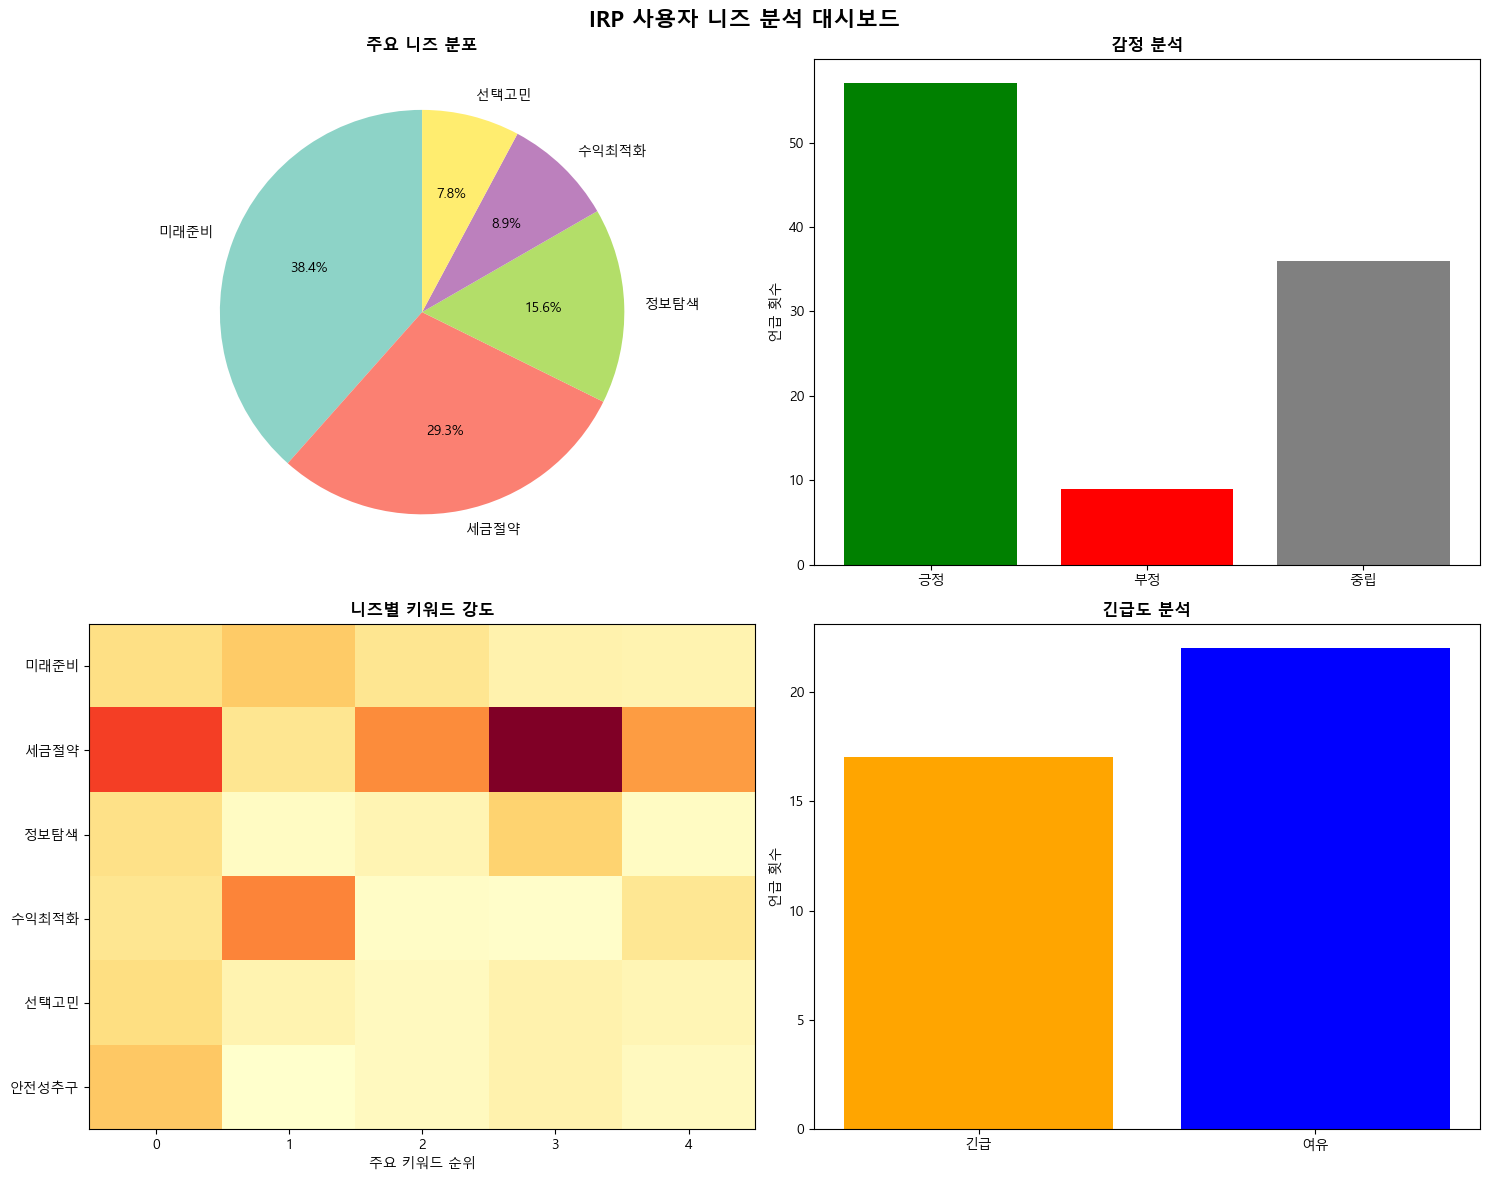

✅ 시각화 결과가 'needs_analysis_dashboard_1750761793.png'으로 저장되었습니다.
✅ 상세 분석 결과가 'needs_analysis_report_1750761794.xlsx'으로 저장되었습니다.


In [14]:
import pandas as pd
import re
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 한국어 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
plt.rcParams['axes.unicode_minus'] = False

class NeedsAnalyzer:
    def __init__(self):
        # 니즈 카테고리별 키워드 패턴 정의
        self.needs_patterns = {
            '정보탐색': {
                'keywords': ['추천', '비교', '어디', '어떤', '뭐가', '어느', '궁금', '알려', '정보', '문의', '질문', '찾고'],
                'description': '상품/서비스 정보를 찾거나 비교하고 싶어함'
            },
            '수익최적화': {
                'keywords': ['수익률', '수익', '높은', '최고', '좋은', '유리한', '이득', '벌기', '수익성', '효율'],
                'description': '더 높은 수익을 원함'
            },
            '세금절약': {
                'keywords': ['세액공제', '절세', '세금', '공제', '혜택', '세제', '한도', '감면'],
                'description': '세금 부담을 줄이고 싶어함'
            },
            '안전성추구': {
                'keywords': ['안전', '원금보장', '보장', '위험', '손실', '안정', '확실', '보수적'],
                'description': '투자 리스크를 최소화하고 싶어함'
            },
            '편의성요구': {
                'keywords': ['간편', '쉬운', '편리', '자동', '간단', '복잡', '어려워', '귀찮'],
                'description': '복잡한 절차 없이 쉽게 이용하고 싶어함'
            },
            '비용민감': {
                'keywords': ['수수료', '비용', '수수료', '저렴', '비싸', '할인', '무료', '공짜'],
                'description': '수수료나 비용 부담을 줄이고 싶어함'
            },
            '선택고민': {
                'keywords': ['고민', '선택', '결정', '망설', '모르겠', '헷갈', '어떻게', '도와'],
                'description': '너무 많은 선택지로 결정하기 어려워함'
            },
            '불만불안': {
                'keywords': ['불만', '화나', '짜증', '속상', '걱정', '불안', '후회', '실망', '문제'],
                'description': '현재 상황에 대한 불만이나 불안감'
            },
            '전문지식부족': {
                'keywords': ['모름', '초보', '처음', '잘모르', '배우고', '공부', '이해안', '설명'],
                'description': '전문지식이 부족해 학습이 필요함'
            },
            '미래준비': {
                'keywords': ['노후', '미래', '준비', '계획', '설계', '대비', '장기', '연금'],
                'description': '노후나 미래를 위한 준비를 하고 싶어함'
            }
        }
        
        # 감정 분석 패턴
        self.emotion_patterns = {
            '긍정': ['좋다', '만족', '추천', '감사', '최고', '훌륭', '완벽', '성공'],
            '부정': ['나쁘다', '실망', '후회', '최악', '문제', '불만', '화나', '속상'],
            '중립': ['그냥', '보통', '괜찮', '평범', '무난']
        }
        
        # 긴급도 패턴
        self.urgency_patterns = {
            '긴급': ['급해', '빨리', '당장', '즉시', '시급', '서둘러', '곧', '마감'],
            '여유': ['천천히', '나중에', '언젠가', '여유', '계획', '설계']
        }

    def analyze_needs_from_csv(self, csv_path):
        """CSV 파일에서 니즈 분석"""
        try:
            df = pd.read_csv(csv_path, encoding='utf-8-sig')
            print(f"✅ CSV 파일 로드: {len(df)}개 행")
        except Exception as e:
            print(f"❌ CSV 로드 실패: {e}")
            return None
        
        if '내용' not in df.columns:
            print("❌ '내용' 컬럼을 찾을 수 없습니다.")
            return None
        
        # 텍스트 전처리
        texts = df['내용'].fillna('').astype(str).tolist()
        all_text = ' '.join(texts).lower()
        
        results = {
            'needs_analysis': self._analyze_needs(all_text, texts),
            'emotion_analysis': self._analyze_emotions(all_text),
            'urgency_analysis': self._analyze_urgency(all_text),
            'demographic_hints': self._analyze_demographics(all_text),
            'pain_points': self._extract_pain_points(texts),
            'solution_requests': self._extract_solution_requests(texts)
        }
        
        return results
    
    def _analyze_needs(self, all_text, texts):
        """니즈 카테고리별 분석"""
        needs_scores = {}
        
        for need_type, data in self.needs_patterns.items():
            score = 0
            keyword_matches = []
            
            for keyword in data['keywords']:
                count = len(re.findall(keyword, all_text))
                score += count
                if count > 0:
                    keyword_matches.append((keyword, count))
            
            needs_scores[need_type] = {
                'score': score,
                'keywords': keyword_matches,
                'description': data['description'],
                'percentage': 0  # 나중에 계산
            }
        
        # 백분율 계산
        total_score = sum([data['score'] for data in needs_scores.values()])
        if total_score > 0:
            for need_type in needs_scores:
                needs_scores[need_type]['percentage'] = round(
                    (needs_scores[need_type]['score'] / total_score) * 100, 1
                )
        
        return needs_scores
    
    def _analyze_emotions(self, all_text):
        """감정 분석"""
        emotion_scores = {}
        
        for emotion, keywords in self.emotion_patterns.items():
            score = sum(len(re.findall(keyword, all_text)) for keyword in keywords)
            emotion_scores[emotion] = score
        
        return emotion_scores
    
    def _analyze_urgency(self, all_text):
        """긴급도 분석"""
        urgency_scores = {}
        
        for urgency, keywords in self.urgency_patterns.items():
            score = sum(len(re.findall(keyword, all_text)) for keyword in keywords)
            urgency_scores[urgency] = score
        
        return urgency_scores
    
    def _analyze_demographics(self, all_text):
        """인구통계학적 힌트 추출"""
        demo_patterns = {
            '연령대': {
                '20대': ['스물', '20대', '이십대', '신입', '취업준비', '대학생'],
                '30대': ['서른', '30대', '삼십대', '신혼', '결혼', '육아'],
                '40대': ['마흔', '40대', '사십대', '중년', '교육비', '대학등록금'],
                '50대': ['쉰', '50대', '오십대', '노후준비', '은퇴준비']
            },
            '직업': {
                '직장인': ['회사원', '직장인', '월급', '연봉', '퇴직금'],
                '자영업': ['사업', '자영업', '개인사업', '프리랜서'],
                '공무원': ['공무원', '공직', '공기업']
            },
            '소득수준': {
                '고소득': ['고소득', '연봉높', '여유', '투자여력'],
                '중간소득': ['보통', '적당', '평범한소득'],
                '저소득': ['적은돈', '부족', '여유없', '빠듯']
            }
        }
        
        demo_results = {}
        for category, subcategories in demo_patterns.items():
            demo_results[category] = {}
            for subcat, keywords in subcategories.items():
                score = sum(len(re.findall(keyword, all_text)) for keyword in keywords)
                demo_results[category][subcat] = score
        
        return demo_results
    
    def _extract_pain_points(self, texts):
        """고통점(Pain Points) 추출"""
        pain_keywords = [
            '복잡해', '어려워', '모르겠', '헷갈려', '귀찮아', '번거로워',
            '비싸', '손해', '후회', '실수', '망했', '잘못', '문제',
            '불안해', '걱정', '무서워', '위험', '손실'
        ]
        
        pain_points = []
        for text in texts:
            if any(keyword in str(text) for keyword in pain_keywords):
                # 고통점이 포함된 문장 추출
                sentences = re.split(r'[.!?]', str(text))
                for sentence in sentences:
                    if any(keyword in sentence for keyword in pain_keywords) and len(sentence.strip()) > 10:
                        pain_points.append(sentence.strip())
        
        return pain_points[:10]  # 상위 10개만
    
    def _extract_solution_requests(self, texts):
        """해결책 요청 추출"""
        solution_keywords = [
            '추천', '알려주', '도와주', '방법', '어떻게', '해결',
            '좋은', '최고', '베스트', '선택', '결정'
        ]
        
        solution_requests = []
        for text in texts:
            if any(keyword in str(text) for keyword in solution_keywords):
                sentences = re.split(r'[.!?]', str(text))
                for sentence in sentences:
                    if any(keyword in sentence for keyword in solution_keywords) and len(sentence.strip()) > 10:
                        solution_requests.append(sentence.strip())
        
        return solution_requests[:10]  # 상위 10개만
    
    def generate_insights_report(self, results):
        """인사이트 리포트 생성"""
        if not results:
            return
        
        print("🎯 " + "="*60)
        print("🎯 사용자 니즈 분석 리포트")
        print("🎯 " + "="*60)
        
        # 1. 주요 니즈 분석
        needs = results['needs_analysis']
        sorted_needs = sorted(needs.items(), key=lambda x: x[1]['score'], reverse=True)
        
        print("\n📊 주요 니즈 순위 (Top 5)")
        print("-" * 50)
        for i, (need_type, data) in enumerate(sorted_needs[:5], 1):
            print(f"{i}. {need_type} ({data['percentage']}%)")
            print(f"   → {data['description']}")
            print(f"   → 언급 횟수: {data['score']}회")
            if data['keywords']:
                top_keywords = sorted(data['keywords'], key=lambda x: x[1], reverse=True)[:3]
                keywords_str = ', '.join([f"{kw}({cnt})" for kw, cnt in top_keywords])
                print(f"   → 주요 키워드: {keywords_str}")
            print()
        
        # 2. 감정 분석
        emotions = results['emotion_analysis']
        print("😊 감정 분석")
        print("-" * 30)
        total_emotion = sum(emotions.values())
        if total_emotion > 0:
            for emotion, score in emotions.items():
                percentage = round((score / total_emotion) * 100, 1)
                print(f"{emotion}: {score}회 ({percentage}%)")
        print()
        
        # 3. 긴급도 분석
        urgency = results['urgency_analysis']
        print("⏰ 긴급도 분석")
        print("-" * 30)
        total_urgency = sum(urgency.values())
        if total_urgency > 0:
            for urg, score in urgency.items():
                percentage = round((score / total_urgency) * 100, 1)
                print(f"{urg}: {score}회 ({percentage}%)")
        print()
        
        # 4. 주요 고통점
        pain_points = results['pain_points']
        if pain_points:
            print("😰 주요 고통점 (Pain Points)")
            print("-" * 40)
            for i, pain in enumerate(pain_points[:5], 1):
                print(f"{i}. {pain[:100]}...")
            print()
        
        # 5. 해결책 요청
        solutions = results['solution_requests']
        if solutions:
            print("💡 해결책 요청사항")
            print("-" * 30)
            for i, solution in enumerate(solutions[:5], 1):
                print(f"{i}. {solution[:100]}...")
            print()
        
        # 6. 비즈니스 인사이트
        self._generate_business_insights(sorted_needs)
    
    def _generate_business_insights(self, sorted_needs):
        """비즈니스 인사이트 생성"""
        print("💼 비즈니스 인사이트 & 제안")
        print("=" * 50)
        
        top_need = sorted_needs[0][0] if sorted_needs else None
        
        insights = {
            '정보탐색': "📋 상품 비교 도구나 추천 시스템 개발 필요",
            '수익최적화': "📈 고수익 상품 라인업 확대 및 수익률 강조 마케팅",
            '세금절약': "💰 세액공제 혜택을 명확히 알려주는 계산기 도구 제공",
            '안전성추구': "🛡️ 원금보장 상품이나 안정성 강조 마케팅 전략",
            '편의성요구': "⚡ UI/UX 개선 및 원클릭 서비스 도입",
            '비용민감': "💸 수수료 할인 이벤트나 무료 서비스 확대",
            '선택고민': "🎯 개인맞춤 상품 추천 알고리즘 도입",
            '불만불안': "📞 고객서비스 강화 및 불만 해결 프로세스 개선",
            '전문지식부족': "📚 교육 콘텐츠 및 가이드 제작",
            '미래준비': "🔮 장기 투자 상품 및 은퇴 설계 서비스 강화"
        }
        
        if top_need and top_need in insights:
            print(f"🎯 최우선 개선점: {insights[top_need]}")
        
        print("\n📋 권장 액션 아이템:")
        print("1. 사용자 교육 콘텐츠 강화 (전문지식 부족 해결)")
        print("2. 상품 비교/추천 기능 개발 (정보탐색 니즈 충족)")
        print("3. 세액공제 혜택 계산기 제공 (세금절약 니즈 충족)")
        print("4. 고객 상담 서비스 확대 (선택고민 해결)")
        print("5. 모바일 앱 UX 개선 (편의성 향상)")

    def create_visualization(self, results):
        """결과 시각화"""
        if not results:
            return
        
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('IRP 사용자 니즈 분석 대시보드', fontsize=16, fontweight='bold')
        
        # 1. 니즈 분석 파이차트
        needs = results['needs_analysis']
        sorted_needs = sorted(needs.items(), key=lambda x: x[1]['score'], reverse=True)
        top_5_needs = sorted_needs[:5]
        
        labels = [need for need, _ in top_5_needs]
        sizes = [data['score'] for _, data in top_5_needs]
        colors = plt.cm.Set3(np.linspace(0, 1, len(labels)))
        
        axes[0, 0].pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
        axes[0, 0].set_title('주요 니즈 분포', fontweight='bold')
        
        # 2. 감정 분석 바차트
        emotions = results['emotion_analysis']
        emotion_names = list(emotions.keys())
        emotion_scores = list(emotions.values())
        
        bars = axes[0, 1].bar(emotion_names, emotion_scores, color=['green', 'red', 'gray'])
        axes[0, 1].set_title('감정 분석', fontweight='bold')
        axes[0, 1].set_ylabel('언급 횟수')
        
        # 3. 니즈별 세부 키워드 히트맵
        needs_matrix = []
        need_names = []
        for need_type, data in sorted_needs[:6]:
            need_names.append(need_type)
            keyword_scores = [kw[1] for kw in data['keywords'][:5]]
            # 5개로 맞추기
            while len(keyword_scores) < 5:
                keyword_scores.append(0)
            needs_matrix.append(keyword_scores[:5])
        
        if needs_matrix:
            im = axes[1, 0].imshow(needs_matrix, cmap='YlOrRd', aspect='auto')
            axes[1, 0].set_title('니즈별 키워드 강도', fontweight='bold')
            axes[1, 0].set_yticks(range(len(need_names)))
            axes[1, 0].set_yticklabels(need_names)
            axes[1, 0].set_xlabel('주요 키워드 순위')
        
        # 4. 긴급도 분석
        urgency = results['urgency_analysis']
        urgency_names = list(urgency.keys())
        urgency_scores = list(urgency.values())
        
        axes[1, 1].bar(urgency_names, urgency_scores, color=['orange', 'blue'])
        axes[1, 1].set_title('긴급도 분석', fontweight='bold')
        axes[1, 1].set_ylabel('언급 횟수')
        
        plt.tight_layout()
        
        # 저장
        filename = f"needs_analysis_dashboard_{int(pd.Timestamp.now().timestamp())}.png"
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        plt.show()
        
        print(f"✅ 시각화 결과가 '{filename}'으로 저장되었습니다.")

# 실행 함수
def analyze_user_needs(csv_file_path):
    """사용자 니즈 분석 실행"""
    analyzer = NeedsAnalyzer()
    
    print("🔍 사용자 니즈 분석을 시작합니다...")
    results = analyzer.analyze_needs_from_csv(csv_file_path)
    
    if results:
        analyzer.generate_insights_report(results)
        analyzer.create_visualization(results)
        
        # 결과를 Excel로 저장
        filename = f"needs_analysis_report_{int(pd.Timestamp.now().timestamp())}.xlsx"
        
        with pd.ExcelWriter(filename) as writer:
            # 니즈 분석 결과
            needs_df = pd.DataFrame([
                {
                    '니즈_카테고리': need_type,
                    '점수': data['score'],
                    '비율(%)': data['percentage'],
                    '설명': data['description']
                }
                for need_type, data in results['needs_analysis'].items()
            ]).sort_values('점수', ascending=False)
            
            needs_df.to_excel(writer, sheet_name='니즈분석', index=False)
            
            # 고통점
            if results['pain_points']:
                pain_df = pd.DataFrame({
                    '순번': range(1, len(results['pain_points']) + 1),
                    '고통점': results['pain_points']
                })
                pain_df.to_excel(writer, sheet_name='고통점', index=False)
            
            # 해결책 요청
            if results['solution_requests']:
                solution_df = pd.DataFrame({
                    '순번': range(1, len(results['solution_requests']) + 1),
                    '해결책_요청': results['solution_requests']
                })
                solution_df.to_excel(writer, sheet_name='해결책요청', index=False)
        
        print(f"✅ 상세 분석 결과가 '{filename}'으로 저장되었습니다.")
    
    return results

# 실행 예시
if __name__ == "__main__":
    # CSV 파일 경로를 입력하세요
    csv_file_path = "naver_cafe_irp_crawling_1750728281.csv"  # 실제 파일명으로 변경하세요
    
    # 니즈 분석 실행
    results = analyze_user_needs(csv_file_path)